In [1]:
#Import All Libraries
from IPython.display import Image
from os import listdir
import analysis as an
import numpy as np
import pathlib

#File Paths
cyclus_output = '../cyclus/europe.sqlite'
pathlib.Path('results/europe').mkdir(parents=True, exist_ok=True)

In [2]:
# Run cyclus simulation
!rm ../cyclus/europe.sqlite
!cyclus -i ../cyclus/input/europe.xml -o ../cyclus/europe.sqlite --warn-limit 0

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [3]:
# Import Cyclus Output File
cursor = an.get_cursor(cyclus_output)

# Get simulation start time, duration, and timestep
ini_yr, ini_month, dur, timestep = an.get_timesteps(cursor)

In [4]:
# Checks average nat_u output required
an.source_throughput(cursor, dur, 0.045, 0.002)

Throughput should be at least: 768143.51901 [kg]


768143.51901034382

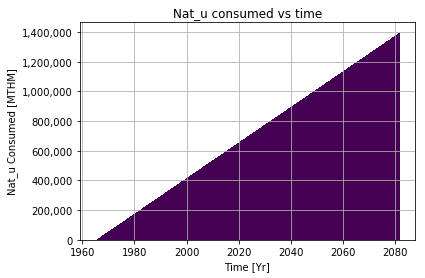

In [5]:
# Nat_u consumption vs Time
consumption = {'Nat_u_consumption': an.nat_u_timeseries(cursor)}
an.stacked_bar_chart(consumption, timestep,
                     'Time [Yr]', 'Nat_u Consumed [MTHM]',
                     'Nat_u consumed vs time',
                     'results/europe/Nat_u consumption',
                     ini_yr)

Image(filename = 'results/europe/Nat_u consumption.png')

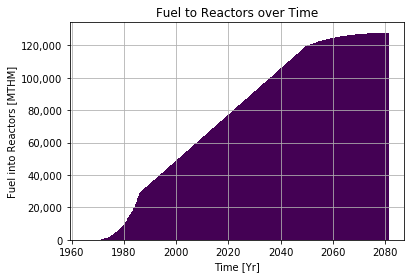

In [6]:
# Fuel into Reactors vs Time
to_reactor = {'Fuel_to_reactor': an.fuel_into_reactors(cursor)}
an.stacked_bar_chart(to_reactor, timestep,
                     'Time [Yr]', 'Fuel into Reactors [MTHM]',
                     'Fuel to Reactors over Time',
                     'results/europe/Fuel to Reactors over Time', 
                     ini_yr)

Image(filename = 'results/europe/Fuel to Reactors over Time.png')

The Average Fuel Utilization Factor is: 
0.0993226801828


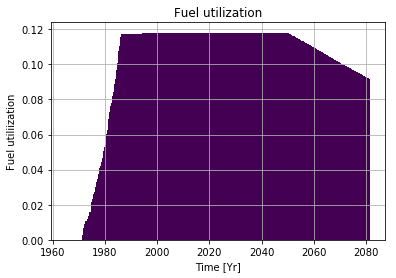

In [7]:
# Fuel utilization vs Time
fuel_util = {'Fuel Utilization Factor': an.u_util_calc(cursor)}
an.stacked_bar_chart(fuel_util, timestep,
                     'Time [Yr]', 'Fuel utiliization',
                     'Fuel utilization',
                     'results/europe/Fuel utilization', 
                     ini_yr)

Image(filename = 'results/europe/Fuel utilization.png')

FuelCycle has no values


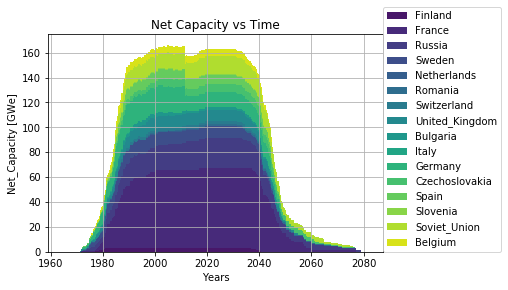

In [8]:
# Capacity vs Time
capacity_dict = an.get_power_dict(cursor)

an.multi_line_plot(capacity_dict, timestep,
                   'Years', 'Net_Capacity [GWe]',
                   'Net Capacity vs Time',
                   'results/europe/Capacity vs Time', 
                   ini_yr)

an.stacked_bar_chart(capacity_dict, timestep,
                     'Years', 'Net_Capacity [GWe]',
                     'Net Capacity vs Time',
                     'results/europe/Capacity vs Time', 
                     ini_yr)
  
Image(filename = 'results/europe/Capacity vs Time.png')

FuelCycle has no values


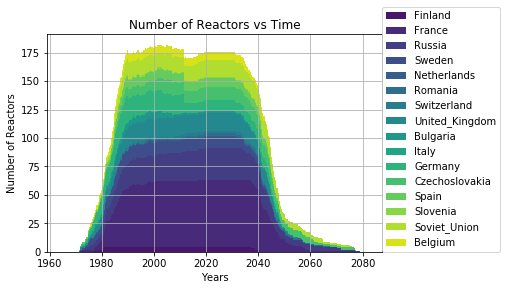

In [9]:
# Number of Reactors vs Time
an.stacked_bar_chart(an.get_deployment_dict(cursor), 
                     timestep, 'Years', 
                     'Number of Reactors',
                     'Number of Reactors vs Time',
                     'results/europe/Number of Reactors vs Time', 
                     ini_yr)

Image(filename = 'results/europe/Number of Reactors vs Time.png')

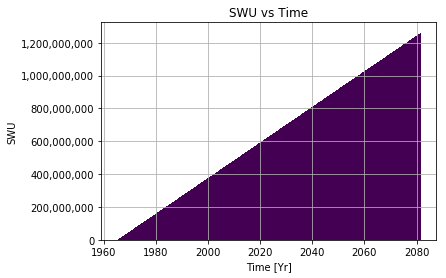

In [10]:
# SWU vs Time
an.stacked_bar_chart(an.get_swu_dict(cursor), 
                     timestep, 'Time [Yr]', 
                     'SWU', 'SWU vs Time',
                     'results/europe/SWU vs Time', 
                     ini_yr)

Image(filename = 'results/europe/SWU vs Time.png')

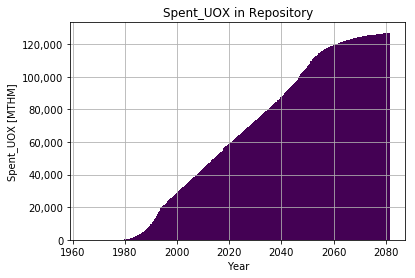

In [11]:
# HLW vs Time
sink_id = an.get_prototype_id(cursor, 'sink_hlw')
hlw = an.facility_commodity_flux(cursor, sink_id,
                                 ['casked_spent_uox'], False)
an.stacked_bar_chart(hlw, timestep,
                     'Year', 'Spent_UOX [MTHM]',
                     'Spent_UOX in Repository',
                     'results/europe/Spent_UOX in Repository', 
                     ini_yr)

Image(filename = 'results/europe/Spent_UOX in Repository.png')

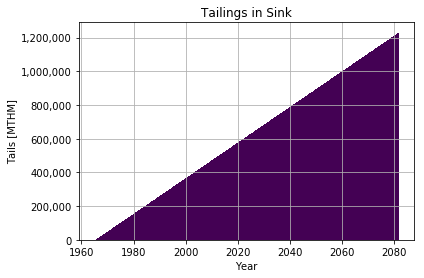

In [12]:
# Tails vs Time
sink_id = an.get_prototype_id(cursor, 'sink_llw')
tailings = an.facility_commodity_flux(cursor, sink_id,
                                      ['tails'], False)

an.stacked_bar_chart(tailings, timestep,
                     'Year', 'Tails [MTHM]',
                     'Tailings in Sink',
                     'results/europe/Tailings in Sink', 
                     ini_yr)

Image(filename = 'results/europe/Tailings in Sink.png')